# DIMENSIONALITY REDUCTION EXAMPLES

# 1-PCA
(for more examples see http://manuals.bioinformatics.ucr.edu/home/R_BioCondManual )
Principal Component Analysis (PCA) is a data reduction technique that allows to simplify multidimensional data sets to alower dimensional space ( tipically using 2 or 3 dimensions)for a first broad visual analysis of the data (via plotting and visual variance analysis). 

The prcomp( ) and princomp( ) R functions are devoted to PCA. 

The BioConductor library "pcaMethods" provides many additional PCA functions.  

In the following we load and examin a common biological dataset to investigate: the IRIS dataset.

This data was used to show that these measurements could be used to differentiate between species of irises. 
That data set  gives the sepal/petal length and width measurements in centimeters for 50 flowers from each of 3 species of iris.  The Iris species are:  setosa, versicolor, and virginica.


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

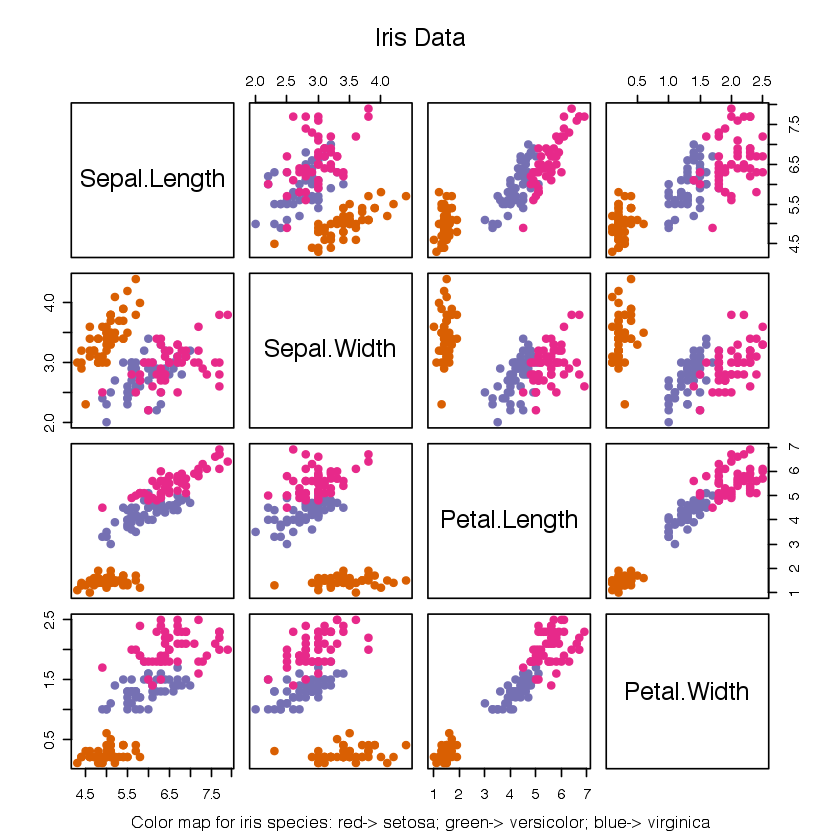

In [34]:
bad2dir='/Users/luisacutillo/Sheffield/BAD DAYS/BAD_DAY2/'
setwd(bad2dir)
getwd()

data(iris)
str(iris); 
summary(iris[1:4])
#dim(iris)
####scatter plot of dimensions against each other
pairs(iris[1:4],main="Iris Data", pch=19, col=as.numeric(iris$Species)+1)

mtext("Color map for iris species: red-> setosa; green-> versicolor; blue-> virginica", 1, line=3.7,cex=.8)

PCA is used to create linear combinations of the original data that capture as much information in the original data as possible. 
We will use the "prcomp" function.

--If we work with standardized data (mean 0 std 1) we have to specify we need to calculate the principal components through correlation matrix.

--If we work with raw data we have to specify we need to calculate the principal components through covariance matrix. 

It is good practice to standardize our variables when these have different units and have very different variances. If they are in the same units both alternatives are possible. 

In our example all variables are measured in centimetres but we will use the correlation matrix for simplicity’s sake.

In [36]:
#To examine variability of all numeric variables
sapply(iris[1:4],var)
range(sapply(iris[1:4],var))
# maybe this range of variability is big in this context.
#Thus, we will use the correlation matrix
#For this, we must standardize our variables with scale() function:
iris.stand <- as.data.frame(scale(iris[,1:4]))
sapply(iris.stand,sd) #now, standard deviations are 1
#sapply(iris.stand,mean) #now, standard deviations are 1


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.6856935    0.1899794    3.1162779    0.5810063

[1] 0.1899794 3.1162779

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1

Sepal.Length   Sepal.Width  Petal.Length   Petal.Width 
-4.484318e-16  2.034094e-16 -2.895326e-17 -3.663049e-17

In [37]:
#If we use prcomp() function, we indicate 'scale=TRUE' to use correlation matrix
pca <- prcomp(iris.stand,scale=T)

#similar with princomp(): princomp(iris.stand, cor=T)
pca
summary(pca)
#This gives us the standard deviation of each component, and the proportion of variance explained by each component.
#The standard deviation is stored in (see 'str(pca)'):
pca$sdev

Standard deviations:
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation:
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

[1] 1.7083611 0.9560494 0.3830886 0.1439265

Usually the trend is to select up to 3 components (for a visualuzation issue) but we can have an indication on how many principal components should be retained. Usually a scree plot helps makink a decision. In R we can use the “screeplot()” function:

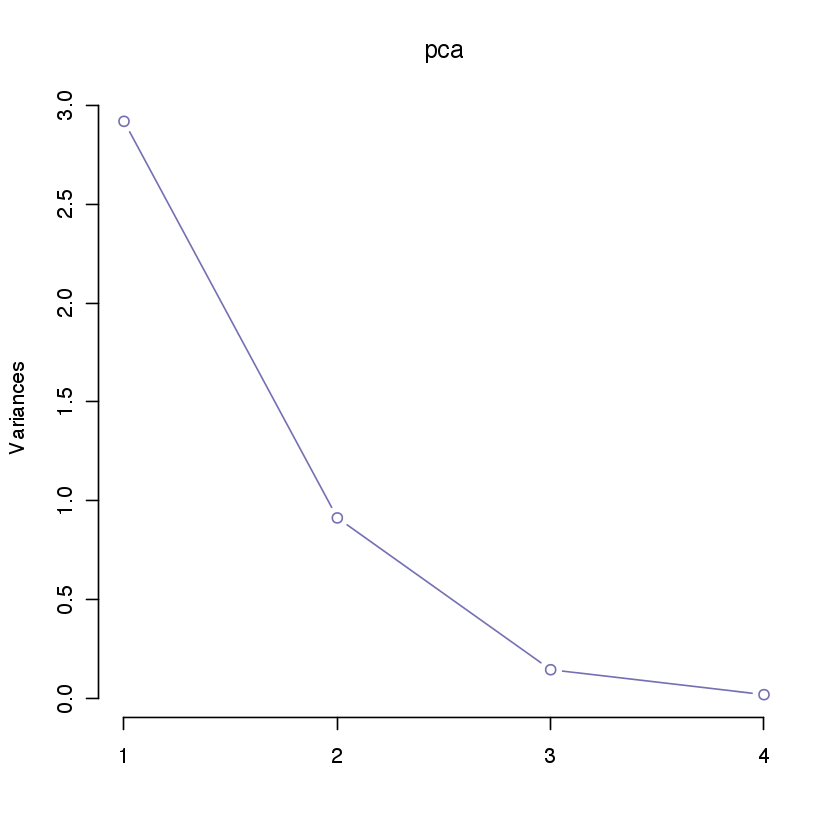

In [39]:
#plot of variance of each PCA.
#It will be useful to decide how many principal components should be retained.
screeplot(pca, type="lines",col=3)

This plot together with the values of the Proportion and Cumulative Proportion of Variance in summary(pca) suggests that we can retain just the first 2 components accounting for over 95% of the variation in the original data!


In [40]:
#retreive loadings for the principal components:
pca$rotation # when using princomp(): pca$loadings

,PC1,PC2,PC3,PC4
Sepal.Length,0.5210659,-0.3774176,0.7195664,0.2612863
Sepal.Width,-0.2693474,-0.9232957,-0.2443818,-0.1235096
Petal.Length,0.58041310,-0.02449161,-0.14212637,-0.80144925
Petal.Width,0.56485654,-0.06694199,-0.63427274,0.52359713


The weights of the PC1 are all similar but the one associated to Sepal.Width variable (it is negative).
This one principal component accounts for over 72% of the variability in the data.

All weights on the second principal component are negative. Thus the PC2 might seem considered as an overall size measurement.  This component explain the 23% of the variability.


The following figure show the first two components and the observations on the same diagram, which helps to interpret the factorial axes while looking at observations location.


The first component discriminate on one side the Sepal.Width and on the other side the rest of variables (see biplot).
According to the second component, When the iris has larger sepal and petal values than average, the PC2 will be smaller than average.

In [92]:
unique(iris$Species)
as.numeric(unique(iris$Species))+1

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

[1] 2 3 4

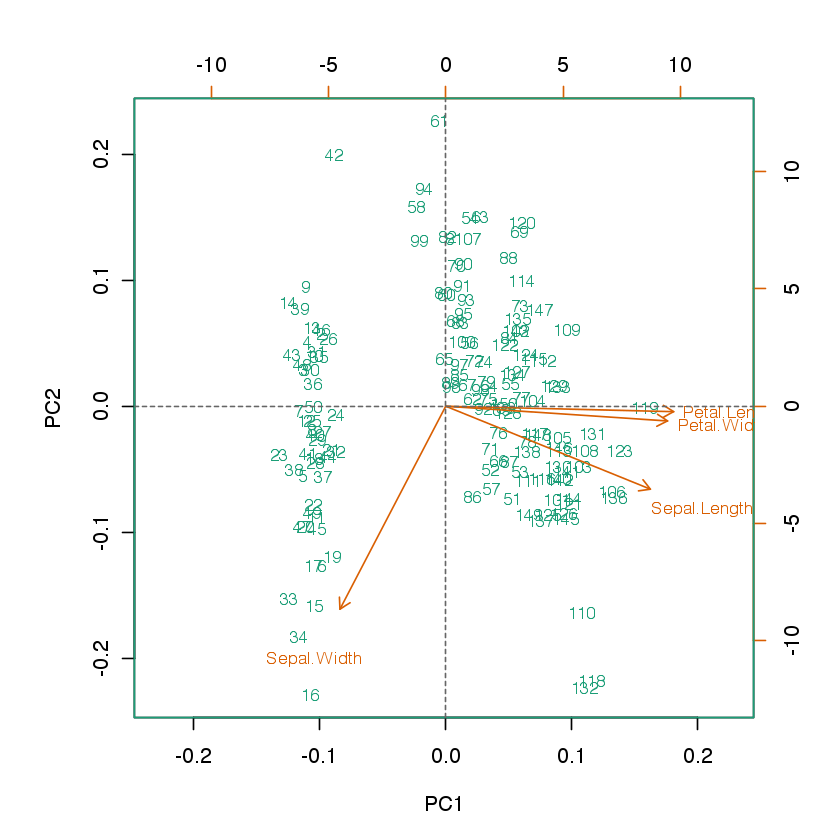

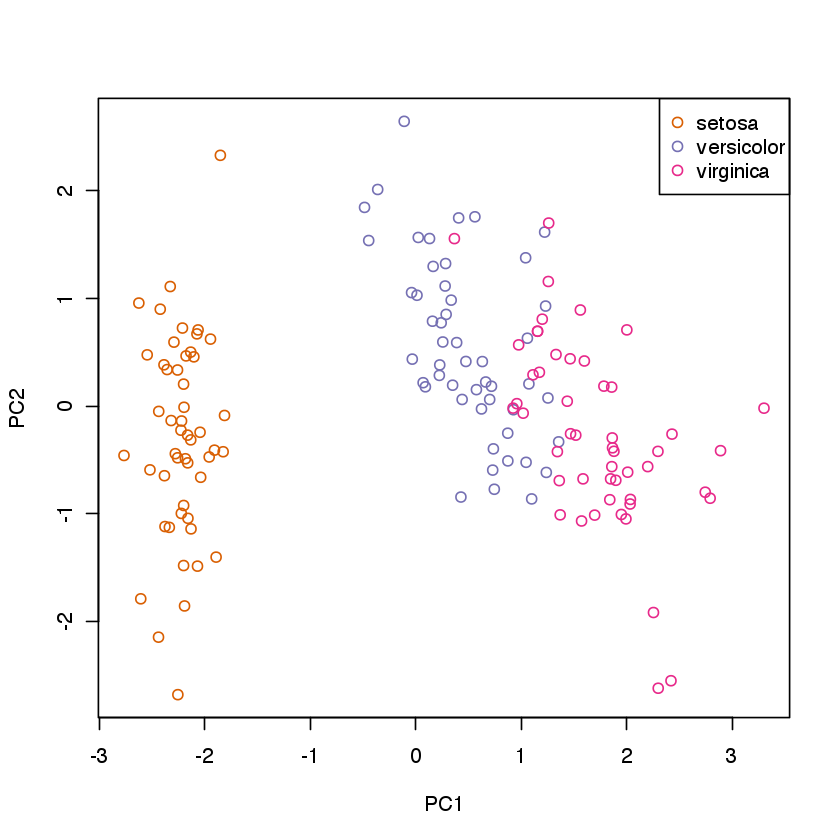

In [82]:
#biplot of first two principal components
biplot(pca,cex=0.8)
abline(h = 0, v = 0, lty = 2, col = 8)
plot(pca$x,col=as.numeric(iris$Species)+1); 
legend("topright",legend=unique(iris$Species),col=unique(as.numeric(iris$Species)+1),
         ,pch=1)

# 2-TSNE and comparison with PCA

The t-Distributed Stochastic Neighbor Embedding (t-SNE algorithm), by Laurens van der Maaten and Geoffrey Hinton, is a NON LINEAR dimensionality reduction algorithm.
It enebles to represent high-dimensional data in two or three dimensions and allows visualization via scatter plots.

Barnes-Hut-SNE is a further improvement of the algorithm by Laurens van der Maaten, which uses Barnes-Hut approximations to significantly improve computational speed (O(N log N) instead of O(N2)). This makes it feasible to apply the algorithm to larger data sets.

We will follow the example proposed oh github https://github.com/lmweber/Rtsne-example using "Rtsne", a package by Jesse Krijthe provides an R wrapper function for the C++ implementation of the Barnes-Hut-SNE algorithm.

The data set used in this example is the healthy human bone marrow data set "Marrow1".

sigma summary: Min. : 0.4865 |1st Qu. : 0.5879 |Median : 0.6149 |Mean : 0.6231 |3rd Qu. : 0.6549 |Max. : 0.7967 |
Epoch: Iteration #100 error is: 12.7995640803848
Epoch: Iteration #200 error is: 0.258376333909864
Epoch: Iteration #300 error is: 0.256274265027876
Epoch: Iteration #400 error is: 0.25621290202863
Epoch: Iteration #500 error is: 0.25621087318454
Epoch: Iteration #600 error is: 0.256210785465463
Epoch: Iteration #700 error is: 0.256210781247803
Epoch: Iteration #800 error is: 0.256210781072151
Epoch: Iteration #900 error is: 0.25621078106419
Epoch: Iteration #1000 error is: 0.256210781063863


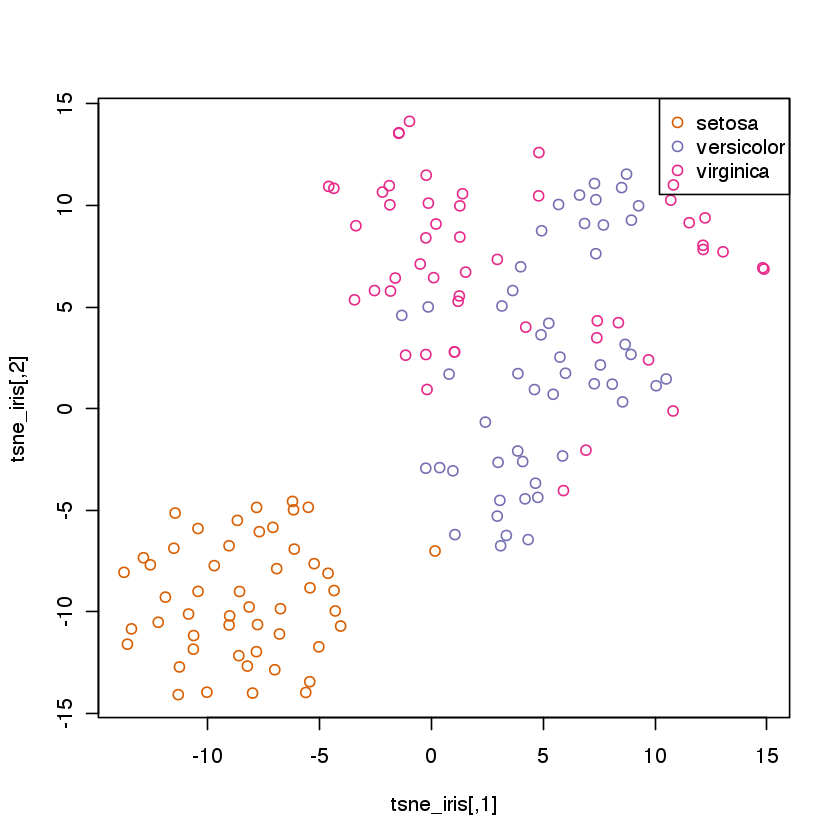

In [104]:
####fist of all, just as an example, apply tsne on the IRIS dataset
tsne_iris = tsne(iris[,1:4])

plot(tsne_iris,col=as.numeric(iris$Species)+1); 
legend("topright",legend=unique(iris$Species),col=unique(as.numeric(iris$Species)+1),
         ,pch=1)


Here we will follow  the example on GITHUB  https://github.com/lmweber/Rtsne-examplefor.
The Marrow1 dataset is made of cells from different cell populations (types). We will see how tsne will be able to  group them as distinct clusters of points in the 2-dimensional projection. There is clear visual separation between clusters. Amir et al. (2013) also independently verified the interpretation of the clusters using "manual gating" methods (visual inspection of 2-dimensional scatter plots), confirming that several clusters represent well-known cell types from immunology.

In [101]:
#install flowCore package from Bioconductor (to read FCS files)
source("https://bioconductor.org/biocLite.R")
biocLite("flowCore")

# install Rtsne package from CRAN (R implementation of Barnes-Hut-SNE algorithm)

install.packages("Rtsne")

# load packages

library(flowCore)
library(Rtsne)



The downloaded binary packages are in
	/var/folders/2n/g19qg3kj5gq45b2w8yx67q3m0000gp/T//Rtmpc5YrSE/downloaded_packages


Bioconductor version 3.3 (BiocInstaller 1.22.3), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.3 (BiocInstaller 1.22.3), R 3.3.1 (2016-06-21).
Installing package(s) ‘flowCore’
also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘Biobase’, ‘BiocGenerics’, ‘graph’, ‘rrcov’, ‘corpcor’, ‘matrixStats’, ‘BH’




The downloaded binary packages are in
	/var/folders/2n/g19qg3kj5gq45b2w8yx67q3m0000gp/T//Rtmpc5YrSE/downloaded_packages


Old packages: 'survival'



The downloaded binary packages are in
	/var/folders/2n/g19qg3kj5gq45b2w8yx67q3m0000gp/T//Rtmpc5YrSE/downloaded_packages


In [105]:
getwd()

[1] "/Users/luisacutillo/Sheffield/BAD DAYS/BAD_DAY2"

In [114]:
data <- exprs(read.FCS("./Rtsne-example-master/data/visne_marrow1.fcs", transformation = FALSE))
head(data)

unname(colnames(data))  # isotope and marker (protein) names


the text section does not end with delimiter: \\. The last keyword is dropped.
the text section does not end with delimiter: \\. The last keyword is dropped.


Event#,Time,Cell Length,191-DNA,193-DNA,115-CD45,"110,111,112,114-CD3",139-CD45RA,141-pPLCgamma2,142-CD19,⋯,166-IkBalpha,167-CD38,168-pH3,170-CD90,169-pP38,171-pBtk/Itk,172-pS6,174-pSrcFK,176-pCREB,175-pCrkL
22933,42448,14.3952541351318,321.224365234375,434.997039794922,142.398864746094,18.5329704284668,117.579620361328,4.83566045761108,50.8025016784668,⋯,2.01998090744019,32.1595115661621,14.3242692947388,8.78977966308594,53.8438720703125,82.9102935791016,6.82119131088257,5.77481985092163,12.3001670837402,1.47696554660797
228744,667323,41.2701225280762,209.346725463867,563.617980957031,50.6623497009277,0.207698747515678,19.1716499328613,-1.39431297779083,10.0177841186523,⋯,4.77909708023071,-0.554699838161469,1.52825391292572,-0.261779695749283,17.9799213409424,1.05463540554047,5.07973480224609,7.08001756668091,-1.72903120517731,-1.05699050426483
230819,549730,28.9195709228516,829.573303222656,1408.71765136719,503.610778808594,294.242279052734,5.1352334022522,0.851677775382996,-0.163829743862152,⋯,12.9460296630859,47.7583084106445,18.4628849029541,0.544328033924103,37.2369117736816,38.1779708862305,79.4033279418945,2.62638735771179,23.709098815918,-1.4266791343689
131780,359184,26.1123237609863,643.06494140625,992.383544921875,178.372894287109,359.293518066406,79.3405914306641,-0.217208936810493,5.70506286621094,⋯,24.1911506652832,49.7774314880371,5.18723297119141,-0.074302151799202,6.8792142868042,11.9926471710205,-0.252708256244659,9.00683784484863,-0.676689684391022,-0.447088569402695
32212,56694,36.6168479919434,713.090698242188,1131.06555175781,34.1338958740234,-12.133674621582,1.37789607048035,3.15276980400085,-0.219338238239288,⋯,3.42627048492432,42.7431793212891,-0.818797945976257,9.73161792755127,10.5622797012329,26.5341262817383,-0.764040887355804,50.8113632202148,16.6444396972656,3.92407631874084
403958,834589,29.3984756469727,638.028625488281,968.785583496094,288.914123535156,65.9604187011719,6.64970970153809,-0.785355031490326,-1.43777287006378,⋯,1.35947692394257,89.945068359375,15.9464015960693,3.46092295646667,4.09092998504639,51.4565811157227,7.69637823104858,28.5201778411865,5.21735811233521,-0.372912496328354


[1] "Event#"              "Time"                "Cell Length"        
 [4] "191-DNA"             "193-DNA"             "115-CD45"           
 [7] "110,111,112,114-CD3" "139-CD45RA"          "141-pPLCgamma2"     
[10] "142-CD19"            "144-CD11b"           "145-CD4"            
[13] "146-CD8"             "148-CD34"            "150-pSTAT5"         
[16] "147-CD20"            "152-Ki67"            "154-pSHP2"          
[19] "151-pERK1/2"         "153-pMAPKAPK2"       "156-pZAP70/Syk"     
[22] "158-CD33"            "160-CD123"           "159-pSTAT3"         
[25] "164-pSLP-76"         "165-pNFkB"           "166-IkBalpha"       
[28] "167-CD38"            "168-pH3"             "170-CD90"           
[31] "169-pP38"            "171-pBtk/Itk"        "172-pS6"            
[34] "174-pSrcFK"          "176-pCREB"           "175-pCrkL"

In [107]:
# select markers to use in calculation of t-SNE projection
# CD11b, CD123, CD19, CD20, CD3, CD33, CD34, CD38, CD4, CD45, CD45RA, CD8, CD90
# (see Amir et al. 2013, Supplementary Tables 1 and 2)

colnames_proj <- unname(colnames(data))[c(11, 23, 10, 16, 7, 22, 14, 28, 12, 6, 8, 13, 30)]
colnames_proj  # check carefully!


# arcsinh transformation
# (see Amir et al. 2013, Online Methods, "Processing of mass cytometry data")

asinh_scale <- 5
data <- asinh(data / asinh_scale)  # transforms all columns! including event number etc


# subsampling

nsub <- 10000
set.seed(123)  # set random seed
data <- data[sample(1:nrow(data), nsub), ]

dim(data)


# prepare data for Rtsne

data <- data[, colnames_proj]      # select columns to use
data <- data[!duplicated(data), ]  # remove rows containing duplicate values within rounding

dim(data)


[1] "144-CD11b"           "160-CD123"           "142-CD19"           
 [4] "147-CD20"            "110,111,112,114-CD3" "158-CD33"           
 [7] "148-CD34"            "167-CD38"            "145-CD4"            
[10] "115-CD45"            "139-CD45RA"          "146-CD8"            
[13] "170-CD90"

[1] 10000    36

[1] 9902   13

In [108]:

file <- paste("./Rtsne-example-master/data/viSNE_Marrow1_nsub", nsub, ".txt", sep = "")
write.table(data, file = file, row.names = FALSE, quote = FALSE, sep = "\t")


# run Rtsne (Barnes-Hut-SNE algorithm)
# without PCA step (see Amir et al. 2013, Online Methods, "viSNE analysis")

set.seed(123)  # set random seed
rtsne_out <- Rtsne(as.matrix(data), pca = FALSE, verbose = TRUE)


# plot 2D t-SNE projection

file_plot <- paste("./Rtsne-example-master/plots/Rtsne_viSNE_Marrow1_nsub", nsub, ".png", sep = "")
png(file_plot, width = 900, height = 900)
plot(rtsne_out$Y, asp = 1, pch = 20, col = "blue", 
     cex = 0.75, cex.axis = 1.25, cex.lab = 1.25, cex.main = 1.5, 
     xlab = "t-SNE dimension 1", ylab = "t-SNE dimension 2", 
     main = "2D t-SNE projection")
dev.off()



Read the 9902 x 13 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Normalizing input...
Building tree...
 - point 0 of 9902
Done in 3.17 seconds (sparsity = 0.013168)!
Learning embedding...
Iteration 50: error is 96.659673 (50 iterations in 6.06 seconds)
Iteration 100: error is 85.398883 (50 iterations in 6.11 seconds)
Iteration 150: error is 81.857030 (50 iterations in 5.84 seconds)
Iteration 200: error is 81.237886 (50 iterations in 6.13 seconds)
Iteration 250: error is 81.063627 (50 iterations in 5.95 seconds)
Iteration 300: error is 3.179002 (50 iterations in 5.94 seconds)
Iteration 350: error is 2.840285 (50 iterations in 5.41 seconds)
Iteration 400: error is 2.660414 (50 iterations in 5.36 seconds)
Iteration 450: error is 2.542222 (50 iterations in 5.34 seconds)
Iteration 500: error is 2.458186 (50 iterations in 5.38 seconds)
Iteration 550: error is 2.393793 (50 iterations in 5.36 seconds)
Iteration 600: er

pdf 
  2

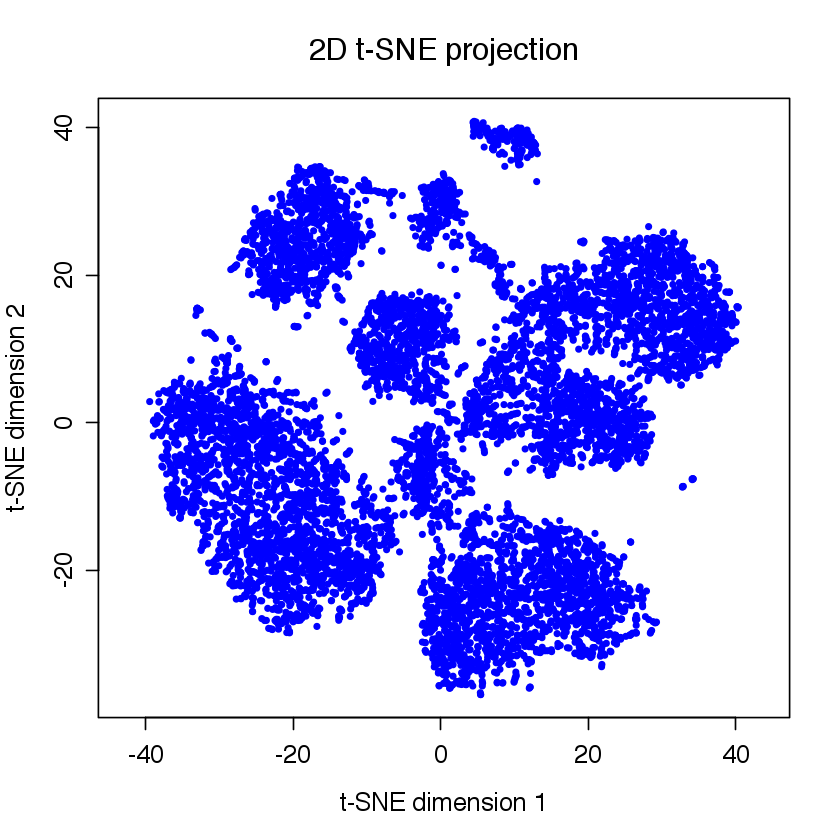

In [109]:
plot(rtsne_out$Y, asp = 1, pch = 20, col = "blue", 
     cex = 0.75, cex.axis = 1.25, cex.lab = 1.25, cex.main = 1.5, 
     xlab = "t-SNE dimension 1", ylab = "t-SNE dimension 2", 
     main = "2D t-SNE projection")

sigma summary: Min. : 0.4865 |1st Qu. : 0.5879 |Median : 0.6149 |Mean : 0.6231 |3rd Qu. : 0.6549 |Max. : 0.7967 |
Epoch: Iteration #100 error is: 12.8489070636344
Epoch: Iteration #200 error is: 0.290605214255192
Epoch: Iteration #300 error is: 0.291223952974878
Epoch: Iteration #400 error is: 0.250843772531019
Epoch: Iteration #500 error is: 0.250812246578321
Epoch: Iteration #600 error is: 0.250805813897757
Epoch: Iteration #700 error is: 0.250803934872807
Epoch: Iteration #800 error is: 0.250803413429886
Epoch: Iteration #900 error is: 0.250803254437592
Epoch: Iteration #1000 error is: 0.250803207414448


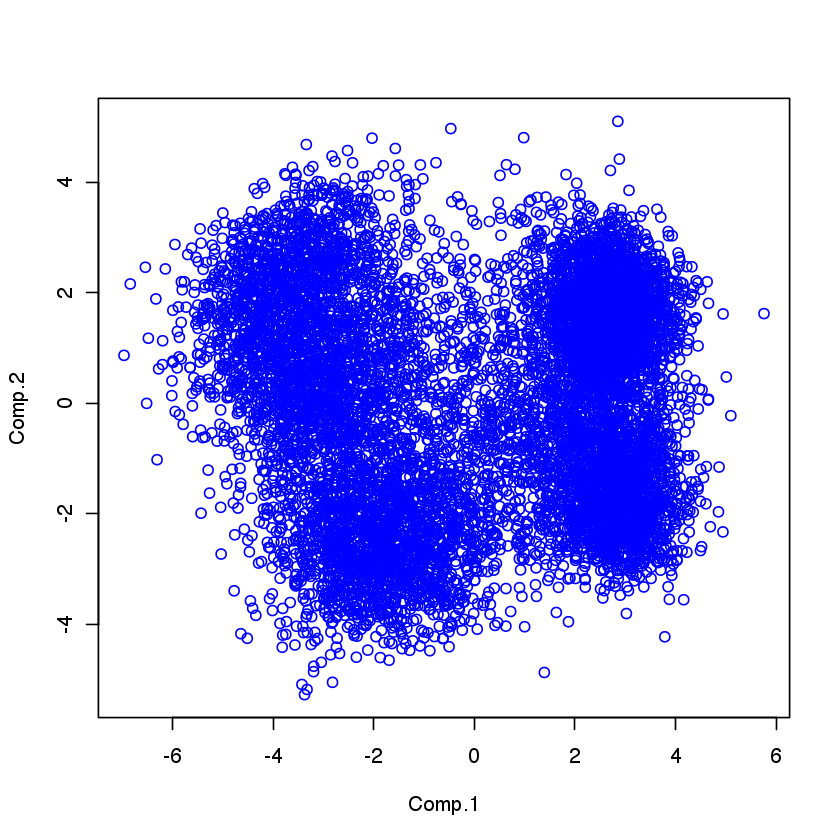

In [112]:

# compare to PCA
pca_data = princomp(as.matrix(data))$scores[,1:2]
plot(pca_data,col="blue")
#text(pca_iris, labels=iris$Species,col=colors[iris$Species])

# ABOUT THE INTERPRETATION OF TSNE
SOME EXAMPLES FROM https://gist.github.com/mikelove/74bbf5c41010ae1dc94281cface90d32
on the delicate interpretation of tsne when the underlyng structure of the data is LINEAR

Explore tisne on linear data. first install (if needed) and load the required packages.

In [10]:
library(rafalib)
library(RColorBrewer)
library(Rtsne)
library(tsne)
library(pracma)
library(Cairo)

sigma summary: Min. : 0.2561 |1st Qu. : 0.2838 |Median : 0.307 |Mean : 0.3145 |3rd Qu. : 0.3372 |Max. : 0.4102 |
Epoch: Iteration #100 error is: 10.0223597447445
Epoch: Iteration #200 error is: 0.0602530537874763
Epoch: Iteration #300 error is: 0.0550311299117053
Epoch: Iteration #400 error is: 0.0529317579988158
Epoch: Iteration #500 error is: 0.0520716570687649
Epoch: Iteration #600 error is: 0.0517315111896983
Epoch: Iteration #700 error is: 0.0516260335868909
Epoch: Iteration #800 error is: 0.0515978340682827
Epoch: Iteration #900 error is: 0.0515904142115037
Epoch: Iteration #1000 error is: 0.0515885640845005
sigma summary: Min. : 0.2572 |1st Qu. : 0.2858 |Median : 0.3135 |Mean : 0.3135 |3rd Qu. : 0.3316 |Max. : 0.4414 |
Epoch: Iteration #100 error is: 9.91720438355781
Epoch: Iteration #200 error is: 0.0583625272824173
Epoch: Iteration #300 error is: 0.0535404198105152
Epoch: Iteration #400 error is: 0.0521409271098465
Epoch: Iteration #500 error is: 0.051575692936105
Epoch: Itera

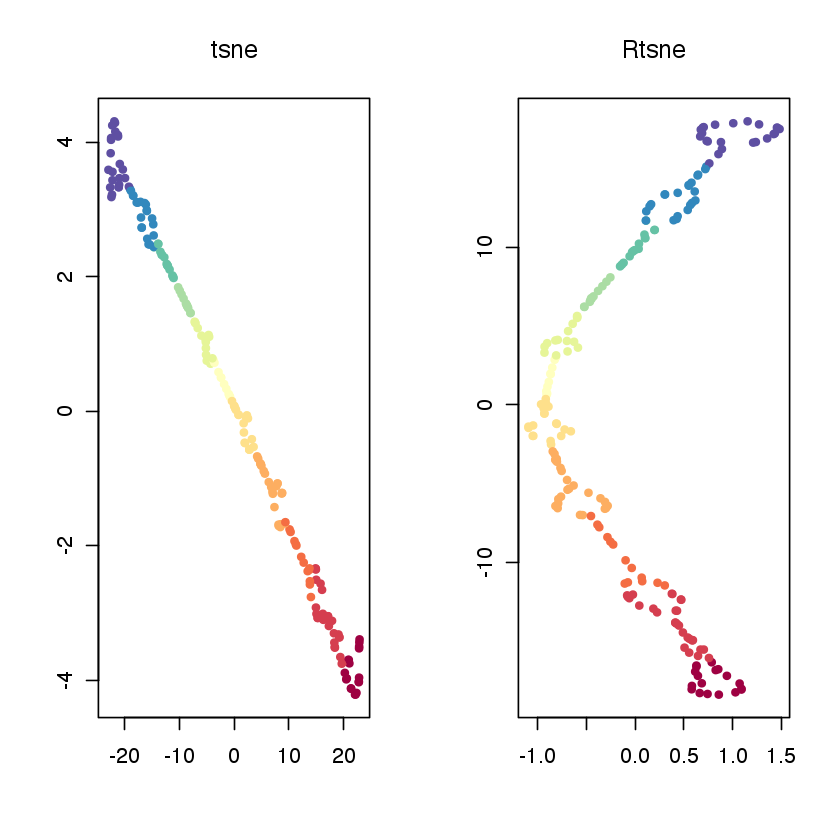

sigma summary: Min. : 0.2769 |1st Qu. : 0.3049 |Median : 0.3126 |Mean : 0.3239 |3rd Qu. : 0.3295 |Max. : 0.4566 |
Epoch: Iteration #100 error is: 9.46153872977552
Epoch: Iteration #200 error is: 0.0552331671987861
Epoch: Iteration #300 error is: 0.0519276914653556
Epoch: Iteration #400 error is: 0.0515047945435669
Epoch: Iteration #500 error is: 0.0513985126886575
Epoch: Iteration #600 error is: 0.0513589148766718
Epoch: Iteration #700 error is: 0.0513411759588658
Epoch: Iteration #800 error is: 0.0513334045692062
Epoch: Iteration #900 error is: 0.0513299740796473
Epoch: Iteration #1000 error is: 0.0513285182821237


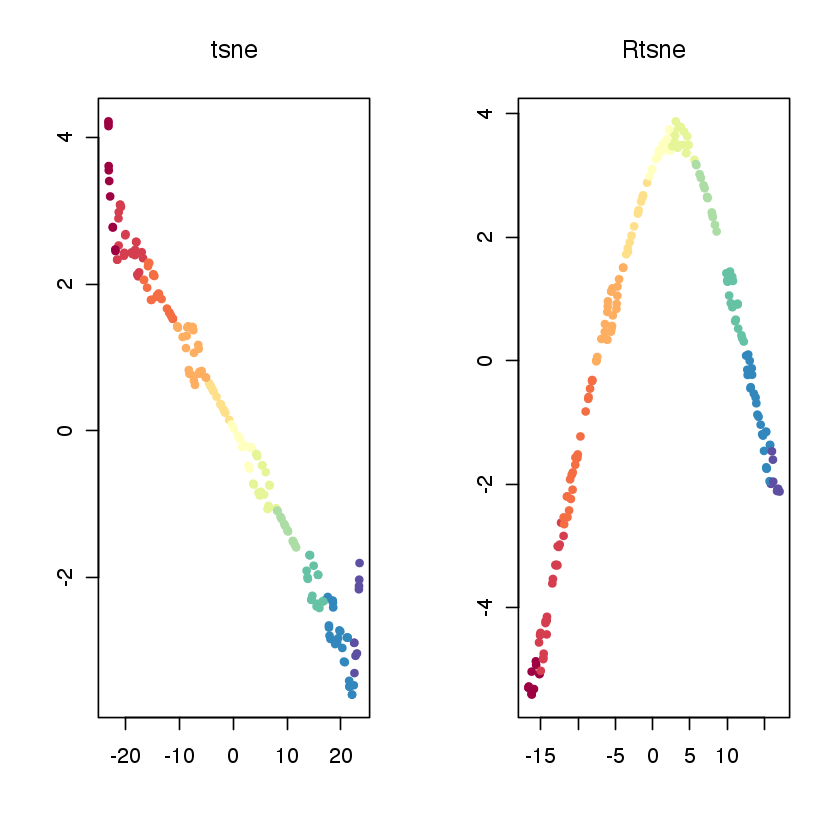

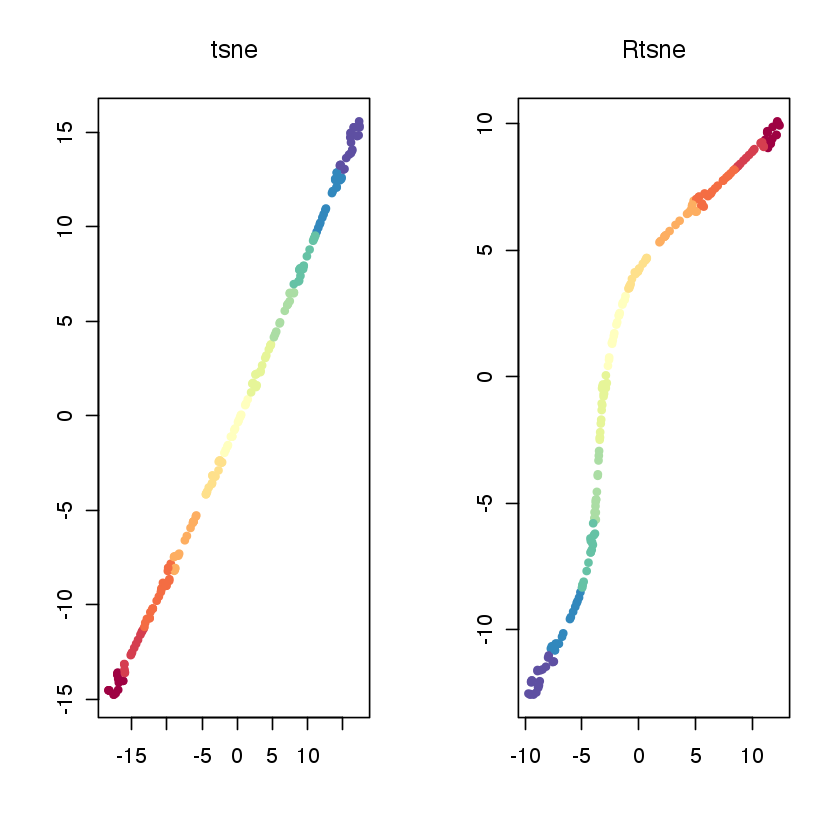

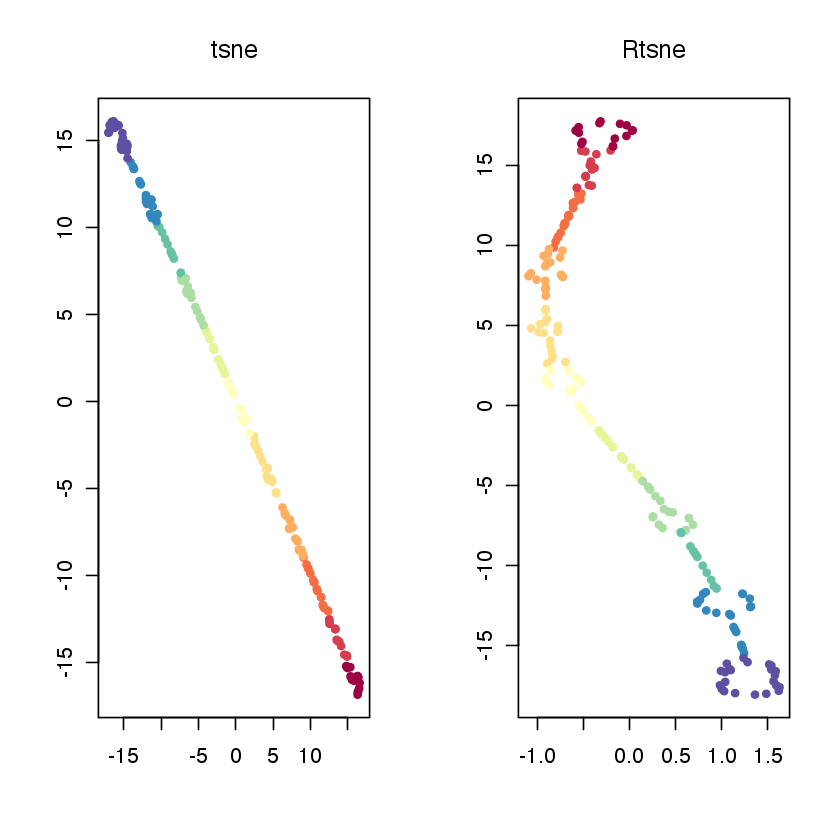

In [116]:
par(mfrow=c(1, 2))
library(Rtsne)
library(tsne)
for (i in 2:5) {
  set.seed(i)
  x <- runif(n, -1, 1)
  cols <- brewer.pal(11, "Spectral")[as.integer(cut(x, 11))]
  ortho <- rortho(m)
  X <- cbind(x, matrix(0,ncol=m-1,nrow=n)) %*% ortho
  res <- tsne(X)
  plot(res, col=cols, pch=20, xlab="", ylab="", main="tsne")
  res <- Rtsne(X)
  plot(res$Y, col=cols, pch=20, xlab="", ylab="", main="Rtsne")
}

sigma summary: Min. : 0.2836 |1st Qu. : 0.3065 |Median : 0.3166 |Mean : 0.331 |3rd Qu. : 0.3383 |Max. : 0.4894 |
Epoch: Iteration #100 error is: 9.7442008339734
Epoch: Iteration #200 error is: 0.0534626013167757
Epoch: Iteration #300 error is: 0.0508669742405626
Epoch: Iteration #400 error is: 0.0506602222521352
Epoch: Iteration #500 error is: 0.0505944452204159
Epoch: Iteration #600 error is: 0.0505668479766549
Epoch: Iteration #700 error is: 0.0505550805154166
Epoch: Iteration #800 error is: 0.0505499656838853
Epoch: Iteration #900 error is: 0.0505477947876463
Epoch: Iteration #1000 error is: 0.0505469210060205
sigma summary: Min. : 0.2561 |1st Qu. : 0.2838 |Median : 0.307 |Mean : 0.3145 |3rd Qu. : 0.3372 |Max. : 0.4102 |
Epoch: Iteration #100 error is: 10.0223597447445
Epoch: Iteration #200 error is: 0.0602530537874763
Epoch: Iteration #300 error is: 0.0550311299117053
Epoch: Iteration #400 error is: 0.0529317579988158
Epoch: Iteration #500 error is: 0.0520716570687649
Epoch: Iterat

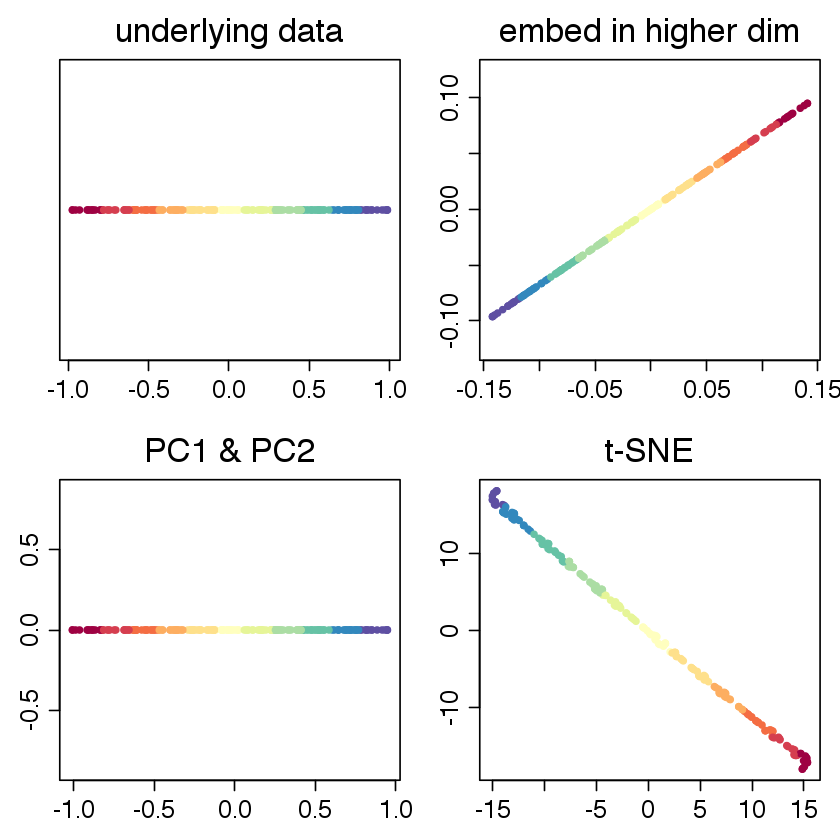

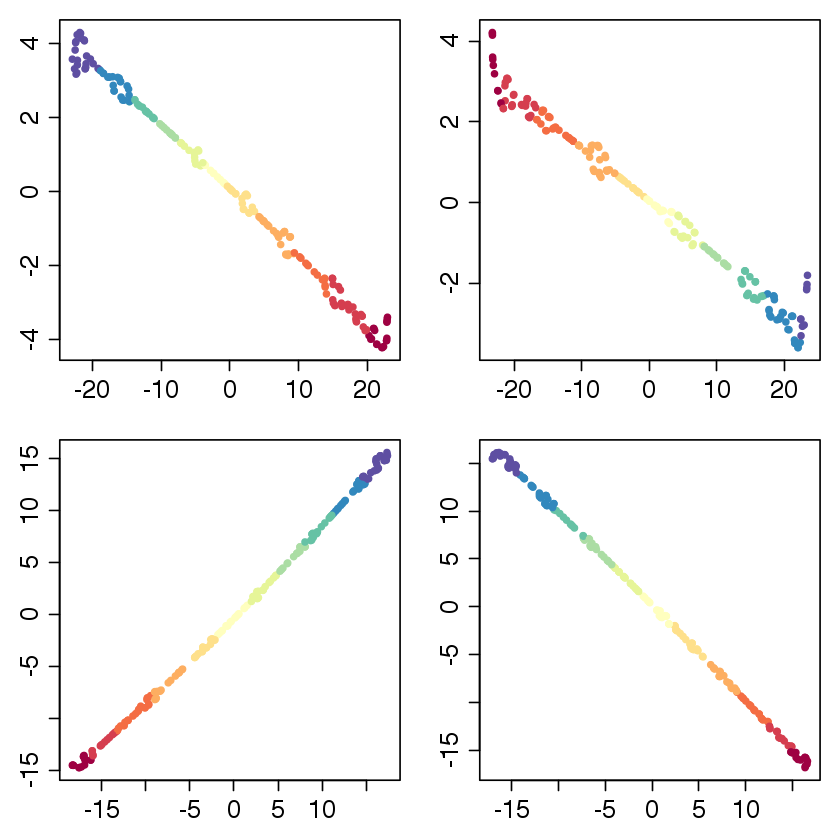

In [117]:
n <- 200
m <- 40
set.seed(1)
x <- runif(n, -1, 1)
library(rafalib)
bigpar(2,2,mar=c(3,3,3,1))
library(RColorBrewer)
cols <- brewer.pal(11, "Spectral")[as.integer(cut(x, 11))]
plot(x, rep(0,n), ylim=c(-1,1), yaxt="n", xlab="", ylab="",
col=cols, pch=20, main="underlying data")
library(pracma)
ortho <- rortho(m)
X <- cbind(x, matrix(0,ncol=m-1,nrow=n)) %*% ortho
plot(X[,1:2], asp=1, col=cols, pch=20, xlab="", ylab="", main="embed in higher dim")
pc <- prcomp(X)
plot(pc$x[,1:2], asp=1, col=cols, pch=20, xlab="", ylab="", main="PC1 & PC2")
library(tsne)
res <- tsne(X)
plot(res, col=cols, pch=20, xlab="", ylab="", main="t-SNE")
bigpar(2,2,mar=c(3,3,1,1))
for (i in 2:5) {
set.seed(i)
x <- runif(n, -1, 1)
cols <- brewer.pal(11, "Spectral")[as.integer(cut(x, 11))]
ortho <- rortho(m)
X <- cbind(x, matrix(0,ncol=m-1,nrow=n)) %*% ortho
res <- tsne(X)
plot(res, col=cols, pch=20, xlab="", ylab="")
}